# Traditional Models for Stock Prediction
This notebook uses Gradient Boosting Machines (GBM) and Deep Neural Networks (DNN) to predict stock prices or trading signals based on the cleaned dataset.

In [1]:
# Install dependencies if needed
# !pip install xgboost scikit-learn tensorflow pandas numpy matplotlib


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


## 1. Load Cleaned Dataset

In [3]:
df = pd.read_csv("cleaned_stock_data.csv")
df.head()


,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,EMA_12_,EMA_26_,MACD_,MACD_Signal_,RSI_,Bollinger_Upper_,Bollinger_Lower_,FedFundsRate
0,2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600,40.479839,40.479839,0.000000,0.000000,NaN,NaN,NaN,1.41
1,2018-01-03,40.472797,41.017982,40.409352,40.543296,118071600,40.478756,40.479318,-0.000562,-0.000112,NaN,NaN,NaN,1.41
2,2018-01-04,40.660778,40.764175,40.437536,40.545630,89738400,40.506759,40.492759,0.014000,0.002710,NaN,NaN,NaN,1.41
3,2018-01-05,41.123711,41.210657,40.665476,40.757123,94640000,40.601675,40.539496,0.062179,0.014604,NaN,NaN,NaN,1.41
4,2018-01-08,40.970982,41.267071,40.872282,40.970982,82271200,40.658491,40.571458,0.087033,0.029090,NaN,NaN,NaN,1.41


## 2. Define Features and Labels

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Detect and Rename the Correct 'Close' Column
for col in df.columns:
    if "close" in col.lower():
        df.rename(columns={col: "Close"}, inplace=True)
        break  # Stop after renaming the correct column

# Verify that 'Close' now exists
print("Updated DF Columns:", df.columns)
assert 'Close' in df.columns, "ERROR: 'Close' is still missing in df!"

# Create Target Variable
df['Target'] = df['Close'].shift(-1)  # Predict next day's close price
df.dropna(inplace=True)  # Drop last row with NaN target

# Define Features and Target
features = df.drop(columns=['Target', 'Date'], errors='ignore')  # Drop Date if it exists
target = df['Target']

# Split into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Final Verification
print("Train Shape:", x_train.shape, y_train.shape)
print("Test Shape:", x_test.shape, y_test.shape)



Updated DF Columns: Index(['Date', 'Close', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL',
       'EMA_12_', 'EMA_26_', 'MACD_', 'MACD_Signal_', 'RSI_',
       'Bollinger_Upper_', 'Bollinger_Lower_', 'FedFundsRate'],
      dtype='object')
Train Shape: (1191, 13) (1191,)
Test Shape: (298, 13) (298,)


## 3. Train Gradient Boosting Machine (XGBoost)

MSE: 5.561979543703116
R²: 0.9977647419558238


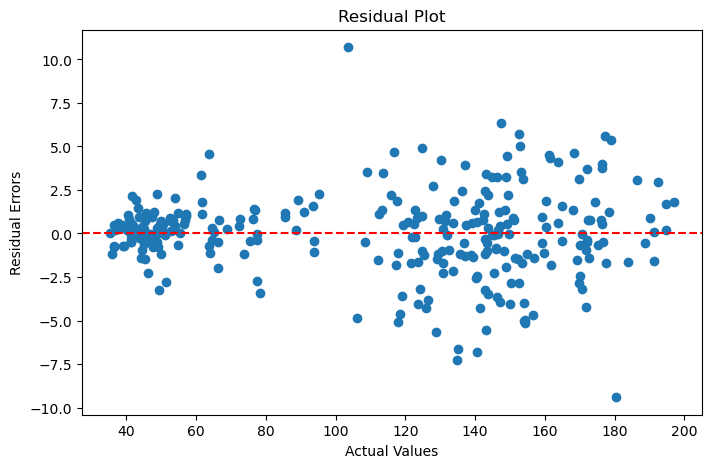

In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Reload your original df from CSV or raw source
df = pd.read_csv("cleaned_stock_data.csv")  # or however you load

# Ensure 'Close' column
for col in df.columns:
    if "close" in col.lower():
        df.rename(columns={col: "Close"}, inplace=True)
        break

# Create target variable (next day's Close)
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Features and target
X = df.drop(columns=['Target', 'Date'], errors='ignore')
y = df['Target']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Scale the features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 7. Train XGBoost (no log transform)
model = xgb.XGBRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    reg_alpha=0.3, 
    reg_lambda=0.5
)
model.fit(x_train_scaled, y_train)

# 8. Predictions
y_pred = model.predict(x_test_scaled)

# 9. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)

# 10. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residual Errors")
plt.title("Residual Plot")
plt.show()


## 4. Train Deep Neural Network (DNN)

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Ensure 'Close' column exists and rename it
for col in df.columns:
    if "close" in col.lower():
        df.rename(columns={col: "Close"}, inplace=True)
        break  # Stop after renaming the correct column

# 2. Create Target Variable (Next Day's Close)
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)  # Remove last row with NaN target

# 3. Define Features and Target
features = df.drop(columns=['Target', 'Date'], errors='ignore')
target = df['Target']

# 4. Normalize Features & Target
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# 5. Build a More Complex DNN Model
dnn_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(1e-4), input_shape=(x_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(1)  # Output layer
])

# 6. Compile Model with a More Reasonable Learning Rate
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse'
)

# 7. Set Up Callbacks for Adaptive Training
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=15,       # Stop if no improvement after 15 epochs
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=5, 
    verbose=1
)

# 8. Train Model (More Epochs, Smaller Batch)
history = dnn_model.fit(
    x_train_scaled, y_train_scaled,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop, reduce_lr]
)

# 9. Make Predictions
y_pred_dnn_scaled = dnn_model.predict(x_test_scaled).flatten()

# 10. Reverse Scaling
y_pred_dnn = scaler_y.inverse_transform(y_pred_dnn_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# 11. Evaluate Model
mse_dnn = mean_squared_error(y_test_actual, y_pred_dnn)
r2_dnn = r2_score(y_test_actual, y_pred_dnn)

print(f"DNN MSE: {mse_dnn:.5f}")
print(f"DNN R^2: {r2_dnn:.5f}")



c:\Users\Blain\anaconda3\envs\trading-ai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.2701 - val_loss: 0.3915 - learning_rate: 1.0000e-04
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9417 - val_loss: 0.3339 - learning_rate: 1.0000e-04
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2309 - val_loss: 0.2515 - learning_rate: 1.0000e-04
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8708 - val_loss: 0.1672 - learning_rate: 1.0000e-04
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7441 - val_loss: 0.1089 - learning_rate: 1.0000e-04
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6649 - val_loss: 0.1098 - learning_rate: 1.0000e-04
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5363 - val_loss: 0.1723 - learning_rate: 1.0000e-04
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4846 - val_loss: 0.2469 - learning_rate: 1.0000e-04
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5368 - val_loss: 0.3353 - learning_

## 5. Visualize Predictions

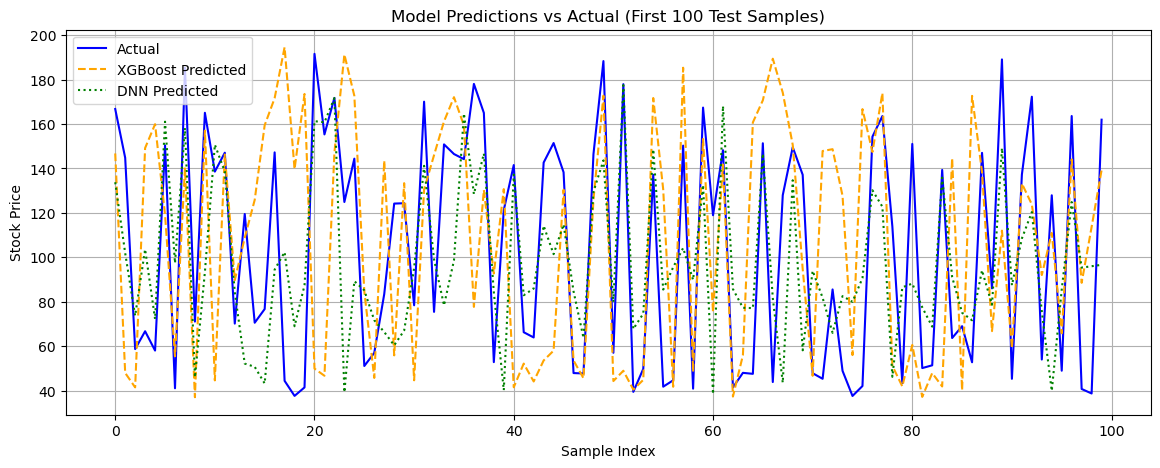

In [7]:
import matplotlib.pyplot as plt

# Use y_test_actual if available (from DNN scaling reversal); otherwise, use y_test from the XGBoost pipeline.
actual = y_test_actual if 'y_test_actual' in globals() else y_test

plt.figure(figsize=(14, 5))
plt.plot(actual[:100], label='Actual', color='blue')
plt.plot(y_pred[:100], label='XGBoost Predicted', color='orange', linestyle='dashed')
plt.plot(y_pred_dnn[:100], label='DNN Predicted', color='green', linestyle='dotted')

plt.title('Model Predictions vs Actual (First 100 Test Samples)')
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

